## OSCAR TOBAR RIOS
Practica Final


# CARGA DE INFORMACION

In [62]:
from utils import plot_decision_boundary, poly_linear_regression, CM_BRIGHT

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline 
df = pd.read_csv("cybersecurity_attacks.csv")

# ANALISIS EXPLORATORIO

### TAMAÑO

In [63]:
print("tamaño",df.shape)

tamaño (40000, 25)


Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Payload Data               object
Malware Indicators         object
Anomaly Scores            float64
Alerts/Warnings            object
Attack Type                object
Attack Signature           object
Action Taken               object
Severity Level             object
User Information           object
Device Information         object
Network Segment            object
Geo-location Data          object
Proxy Information          object
Firewall Logs              object
IDS/IPS Alerts             object
Log Source                 object
dtype: object

### DTYPES

In [ ]:
df.dtypes

### DESCRIBE

In [ ]:
df.describe()

In [65]:
df.describe(include = "all").fillna("-")


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
count,40000,40000,40000,40000.0,40000.0,40000,40000.0,40000,40000,40000,...,40000,40000,40000,40000,40000,40000,20149,20039,19950,40000
unique,39997,40000,40000,-,-,3,-,2,3,40000,...,3,3,32389,32104,3,8723,20148,1,1,2
top,2022-06-11 14:28:15,103.216.15.12,84.9.164.252,-,-,ICMP,-,Control,DNS,Qui natus odio asperiores nam. Optio nobis ius...,...,Blocked,Medium,Ishaan Chaudhari,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,Segment C,"Ghaziabad, Meghalaya",39.123.165.122,Log Data,Alert Data,Firewall
freq,2,1,1,-,-,13429,-,20237,13376,1,...,13529,13435,6,35,13408,16,2,20039,19950,20116
mean,-,-,-,32970.35645,33150.86865,-,781.452725,-,-,-,...,-,-,-,-,-,-,-,-,-,-
std,-,-,-,18560.425604,18574.668842,-,416.044192,-,-,-,...,-,-,-,-,-,-,-,-,-,-
min,-,-,-,1027.0,1024.0,-,64.0,-,-,-,...,-,-,-,-,-,-,-,-,-,-
25%,-,-,-,16850.75,17094.75,-,420.0,-,-,-,...,-,-,-,-,-,-,-,-,-,-
50%,-,-,-,32856.0,33004.5,-,782.0,-,-,-,...,-,-,-,-,-,-,-,-,-,-
75%,-,-,-,48928.25,49287.0,-,1143.0,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [66]:
objetivo =df[[
    "Severity Level","Action Taken","Attack Type","Packet Length" ]] 
objetivo.tail(5) 
objetivo.dtypes

Severity Level    object
Action Taken      object
Attack Type       object
Packet Length      int64
dtype: object

In [67]:
df

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,Logged,Medium,Adira Madan,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,"Nashik, Manipur",NaN,Log Data,Alert Data,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,Logged,High,Rati Dara,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,NaN,Firewall
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,Blocked,Low,Samiha Joshi,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,"Mahbubnagar, Himachal Pradesh",NaN,Log Data,Alert Data,Server
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,Ignored,Low,Rasha Chauhan,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Segment B,"Rourkela, Arunachal Pradesh",137.76.130.8,Log Data,NaN,Server


## outliers

<Axes: xlabel='Packet Length', ylabel='index'>

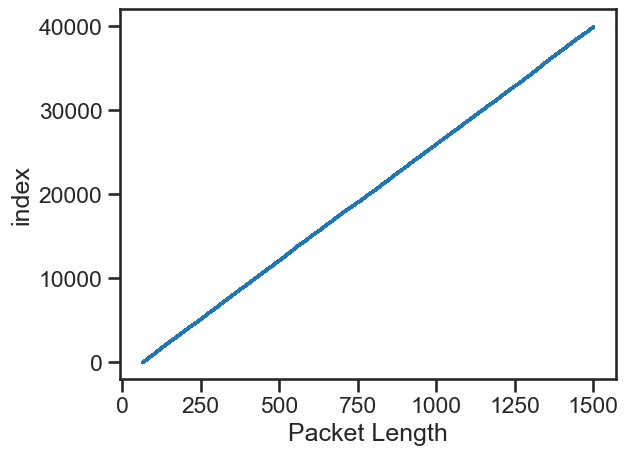

In [102]:
df["Packet Length"].sort_values().reset_index(drop=True).reset_index().plot.scatter(x="Packet Length", y="index", s=0.1)

No se encontraron outliers en el dataframe

## Tablas de frecuencias
 como son datos categoricos organizamos estos conteos en una tabla de frecuencia, que registra los totales y los nombres de las categorías utilizando la función value_counts 

In [68]:
df.value_counts(df["Attack Type"])

Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

Tabla de frecuencia relativa

In [69]:
# tabla de frecuencia relativa de 'Attack Type
100 * df['Attack Type'].value_counts() / len(df['Attack Type'])

Attack Type
DDoS         33.5700
Malware      33.2675
Intrusion    33.1625
Name: count, dtype: float64

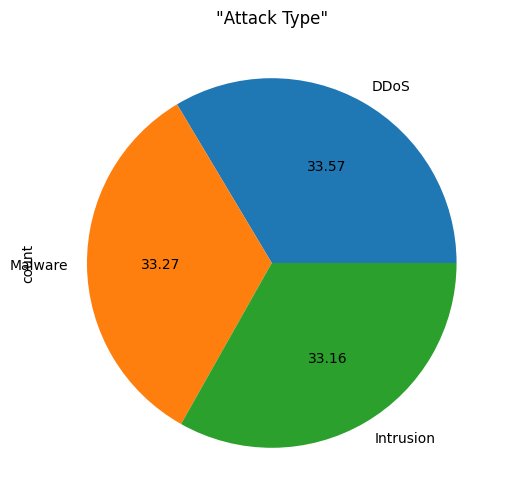

In [70]:
# Gráfico de tarta de Attack Type
plot = df["Attack Type"].value_counts().plot(kind='pie', autopct='%.2f',
                                            figsize=(6, 6),
                                            title='"Attack Type"')

In [71]:
# tabla de frecuencia relativa de Action Taken
100 * df['Action Taken'].value_counts() / len(df['Action Taken'])

Action Taken
Blocked    33.8225
Ignored    33.1900
Logged     32.9875
Name: count, dtype: float64

In [72]:
df["Action Taken"].value_counts()

Action Taken
Blocked    13529
Ignored    13276
Logged     13195
Name: count, dtype: int64

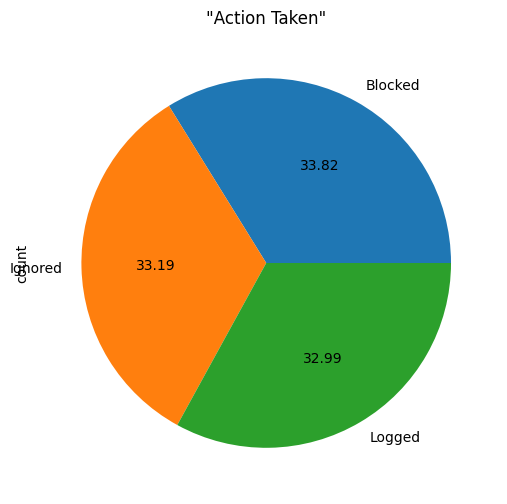

In [73]:
# Gráfico de tarta de Action Taken
plot = df["Action Taken"].value_counts().plot(kind='pie', autopct='%.2f',
                                            figsize=(6, 6),
                                            title='"Action Taken"')

In [74]:
# tabla de frecuencia relativa de Severity Level
100 * df['Severity Level'].value_counts() / len(df['Severity Level'])

Severity Level
Medium    33.5875
High      33.4550
Low       32.9575
Name: count, dtype: float64

In [75]:
objetivo["Severity Level"].value_counts()

Severity Level
Medium    13435
High      13382
Low       13183
Name: count, dtype: int64

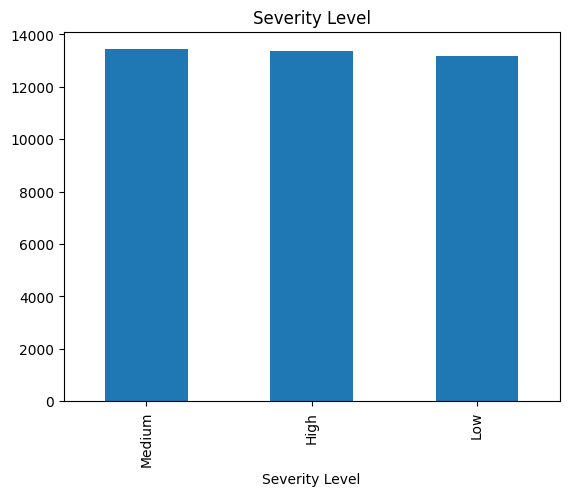

In [76]:
# Gráfico de barras de Severity Level
plot = objetivo['Severity Level'].value_counts().plot(kind='bar',
                                            title='Severity Level')

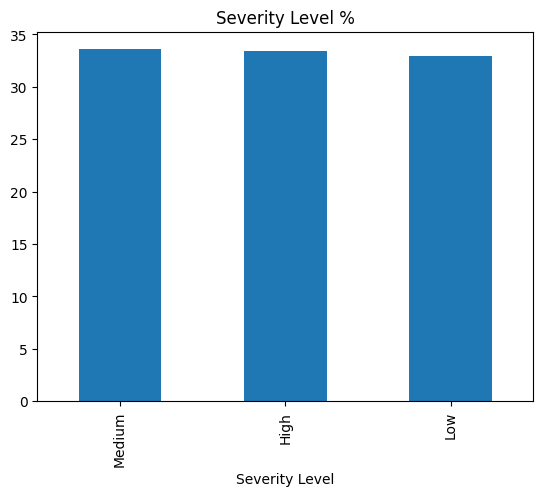

In [77]:
# gráfico de barras de frecuencias relativas.
plot = (100 * df['Severity Level'].value_counts() / len(df['Severity Level'])).plot(
kind='bar', title='Severity Level %')

In [78]:
# Tabla de contingencia Severity Level / "Action Taken
pd.crosstab(index=df['Severity Level'],
            columns=df['Action Taken'], margins=True)

Action Taken,Blocked,Ignored,Logged,All
Severity Level,,,,
High,4530,4460,4392,13382
Low,4481,4409,4293,13183
Medium,4518,4407,4510,13435
All,13529,13276,13195,40000


In [79]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df['Severity Level'], columns=df['Action Taken'],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

Action Taken,Blocked,Ignored,Logged,All
Severity Level,,,,
High,11.3250,11.1500,10.9800,33.4550
Low,11.2025,11.0225,10.7325,32.9575
Medium,11.2950,11.0175,11.2750,33.5875
All,33.8225,33.1900,32.9875,100.0000


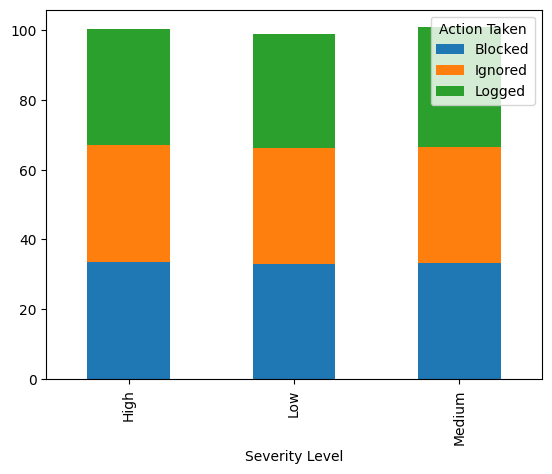

In [80]:
# Gráfico de barras de Severity Level segun Action Taken
plot = pd.crosstab(index=df['Severity Level'],
            columns=df['Action Taken']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

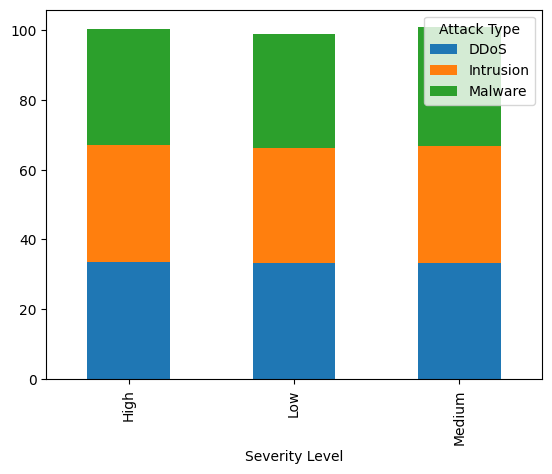

In [81]:
# Gráfico de barras de Severity Level segun Action Taken
plot = pd.crosstab(index=df['Severity Level'],
            columns=df['Attack Type']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

# Correlacion de variables categoricas usando chi-cuadrado

In [82]:

from scipy.stats import chi2_contingency

def cramers_v(x, y):
    # Se crea la tabla de contingencia entre las dos variables categóricas
    confusion_matrix = pd.crosstab(x, y)
    
    # Se realiza la prueba de chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    
    # Se calcula phi² y se normaliza
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    
    # Dimensiones de la tabla
    r, k = confusion_matrix.shape
    
    # Corrección para tablas que no son cuadradas (ajuste de bias)
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))




In [83]:

resultado = cramers_v(df['Severity Level'], df['Attack Type'])
print("La V de Cramer es:", resultado)
print(f'% La V de Cramer es: {resultado:.2f}')

La V de Cramer es: 0.0
% La V de Cramer es: 0.00


In [84]:
resultado = cramers_v(df['Severity Level'], df['Action Taken'])
print(f'% La V de Cramer es: {resultado:.2f}')

% La V de Cramer es: 0.00


In [85]:
resultado = cramers_v(df['Attack Type'], df['Action Taken'])
print(f'% La V de Cramer es: {resultado:.2f}')

% La V de Cramer es: 0.00


In [86]:
resultado = cramers_v( df['Packet Length'],df['Attack Type'])
print(f'% La V de Cramer es: {resultado:.2f}')

% La V de Cramer es: 0.00


In [87]:

import pandas as pd
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)

 

In [88]:
selected_column= df[categorical_features]
categorical_df = selected_column.copy()

## ALTA CORRELACION

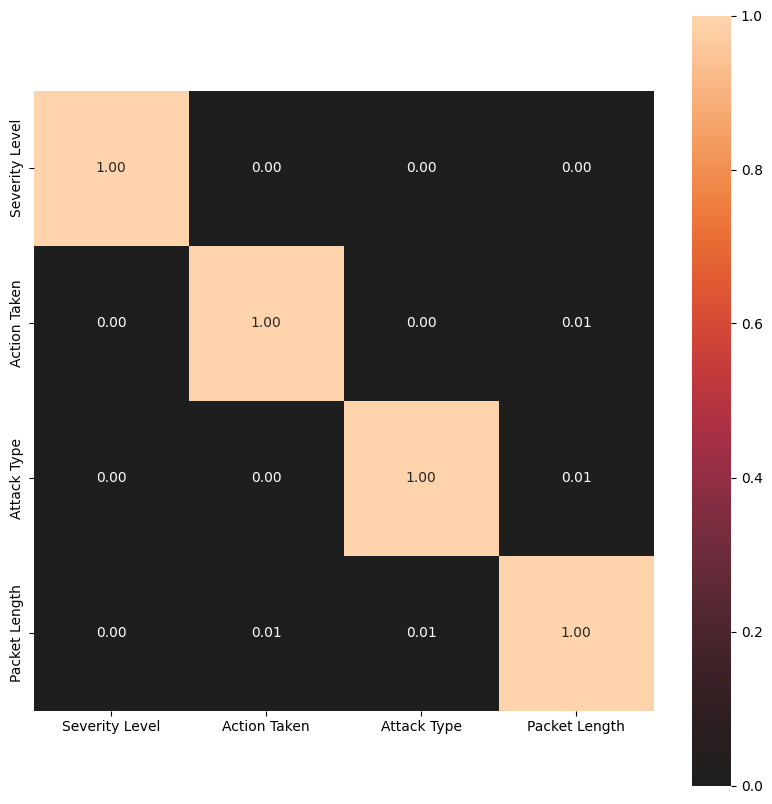

In [89]:
categorical_correlation= associations(objetivo, filename= 'categorical_correlation.png', figsize=(10,10))


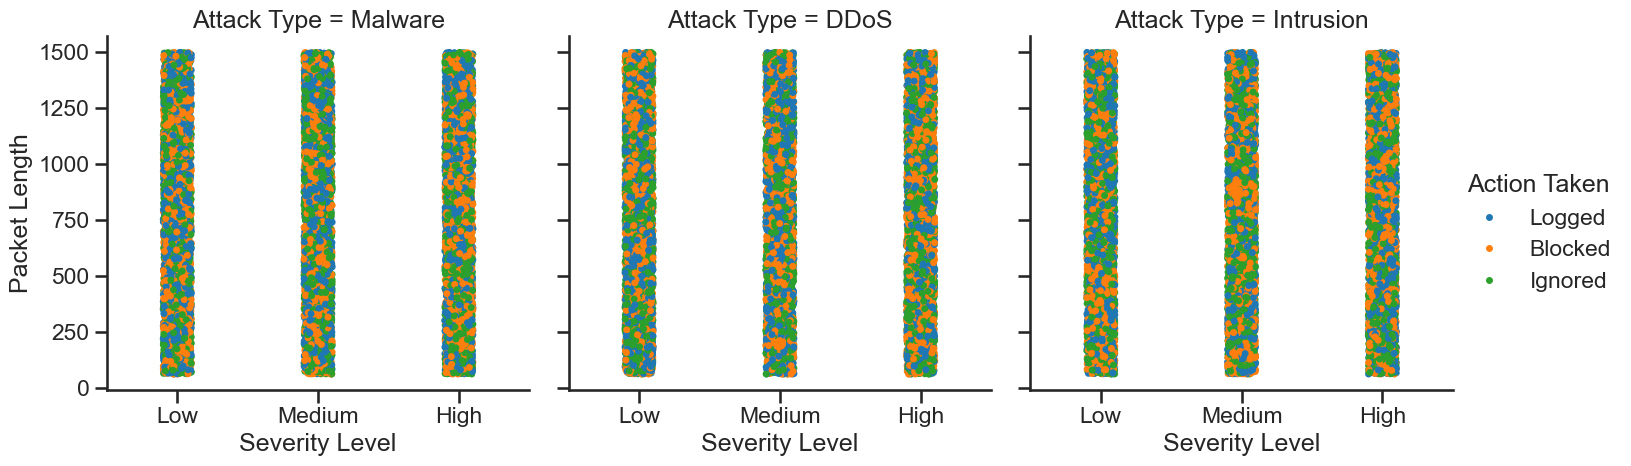

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks",context="talk",palette="tab10")
sns.catplot(x="Severity Level",y="Packet Length",data=df,kind="strip",hue="Action Taken" ,col="Attack Type")
plt.show()

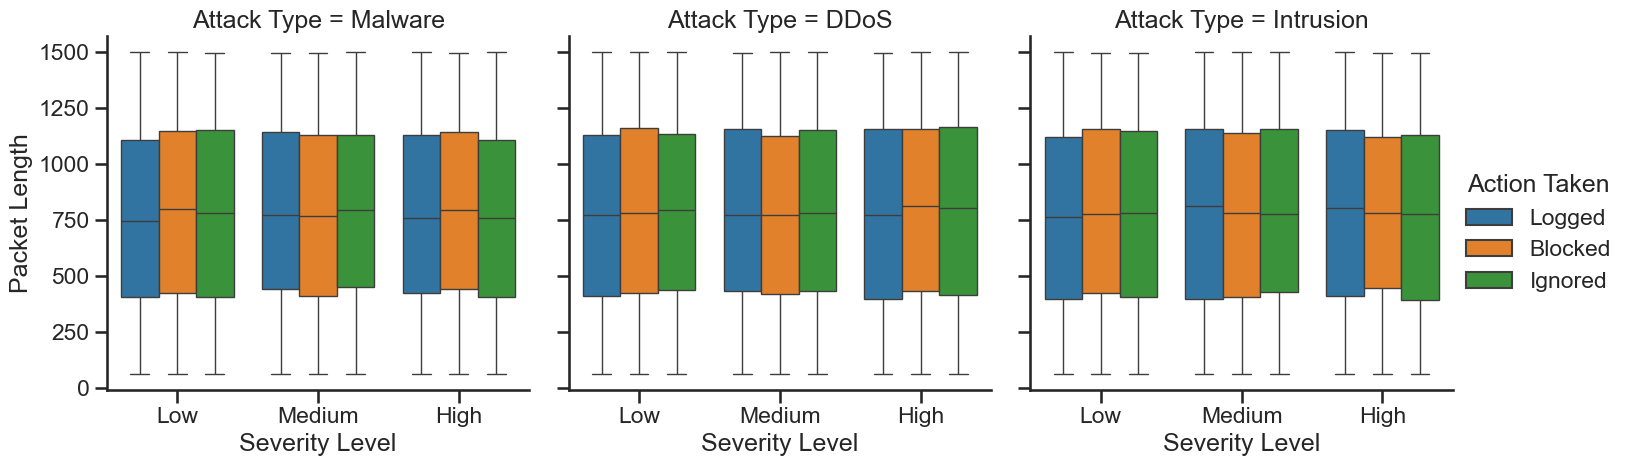

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks",context="talk",palette="tab10")
sns.catplot(x="Severity Level",y="Packet Length",data=df,kind="box",hue="Action Taken" ,col="Attack Type")
plt.show()

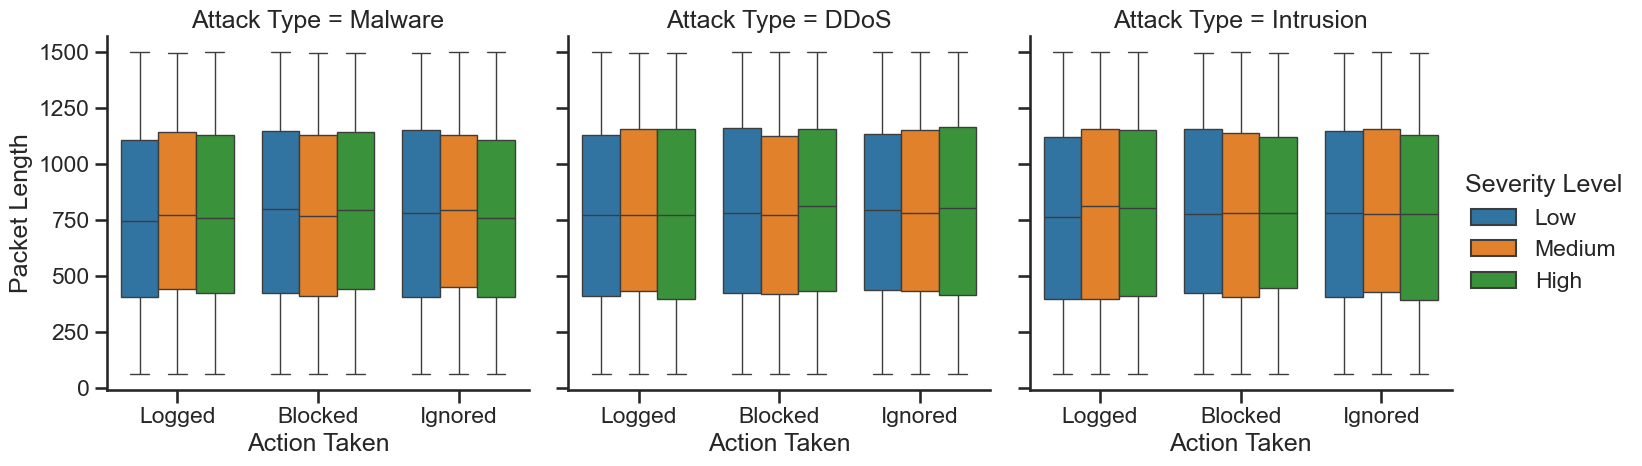

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks",context="talk",palette="tab10")
sns.catplot(x="Action Taken",y="Packet Length",data=df,kind="box",hue="Severity Level" ,col="Attack Type")
plt.show()

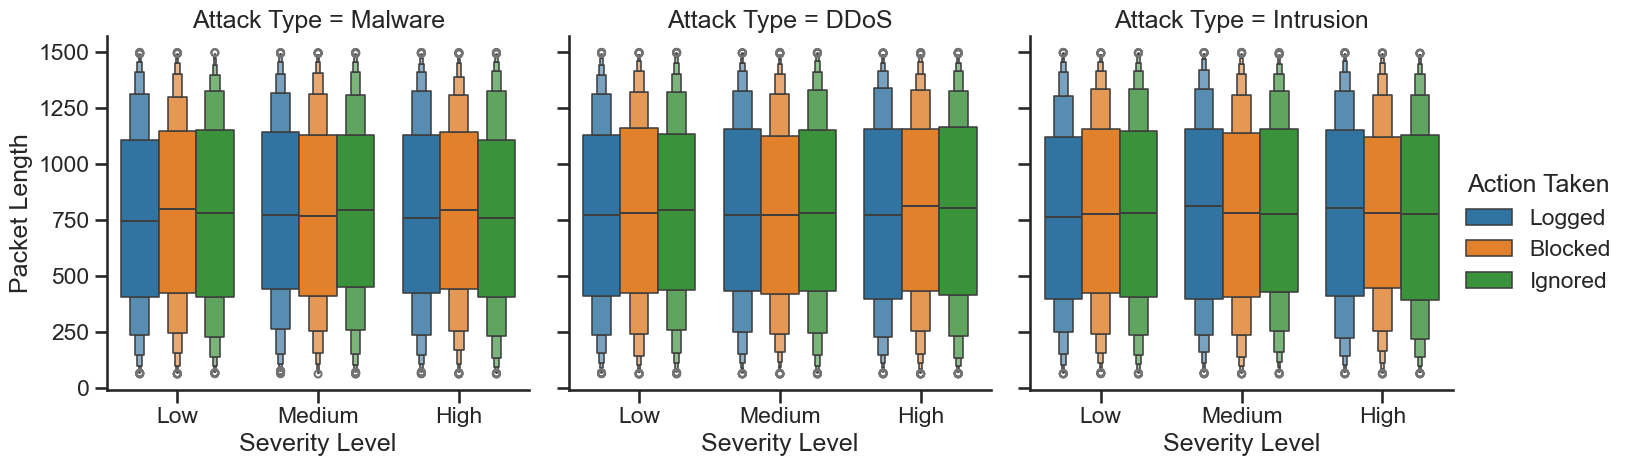

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks",context="talk",palette="tab10")
sns.catplot(x="Severity Level",y="Packet Length",data=df,kind="boxen",hue="Action Taken" ,col="Attack Type")
plt.show()

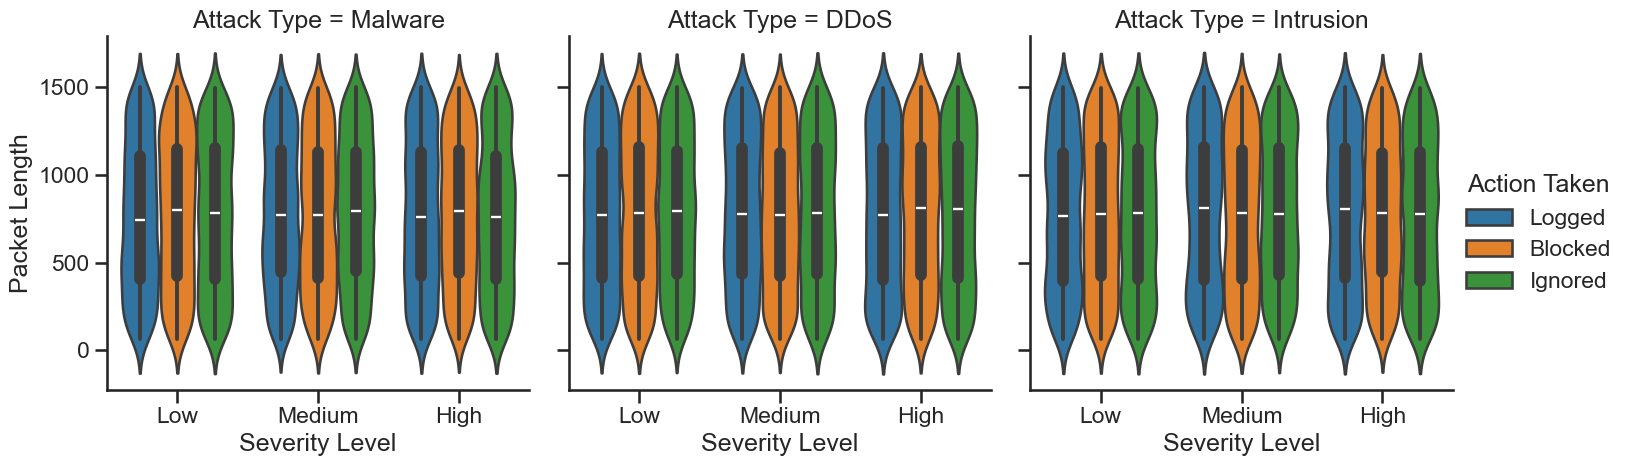

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks",context="talk",palette="tab10")
sns.catplot(x="Severity Level",y="Packet Length",data=df,kind="violin",hue="Action Taken" ,col="Attack Type")
plt.show()

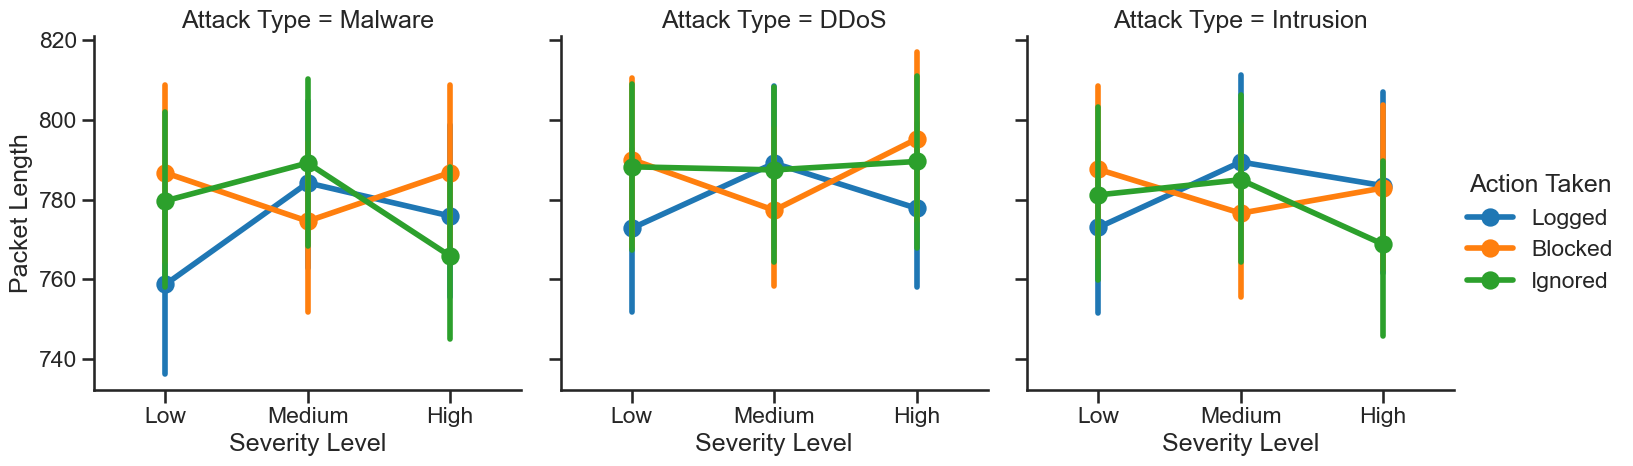

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks",context="talk",palette="tab10")
sns.catplot(x="Severity Level",y="Packet Length",data=df,kind="point",hue="Action Taken" ,col="Attack Type")
plt.show()

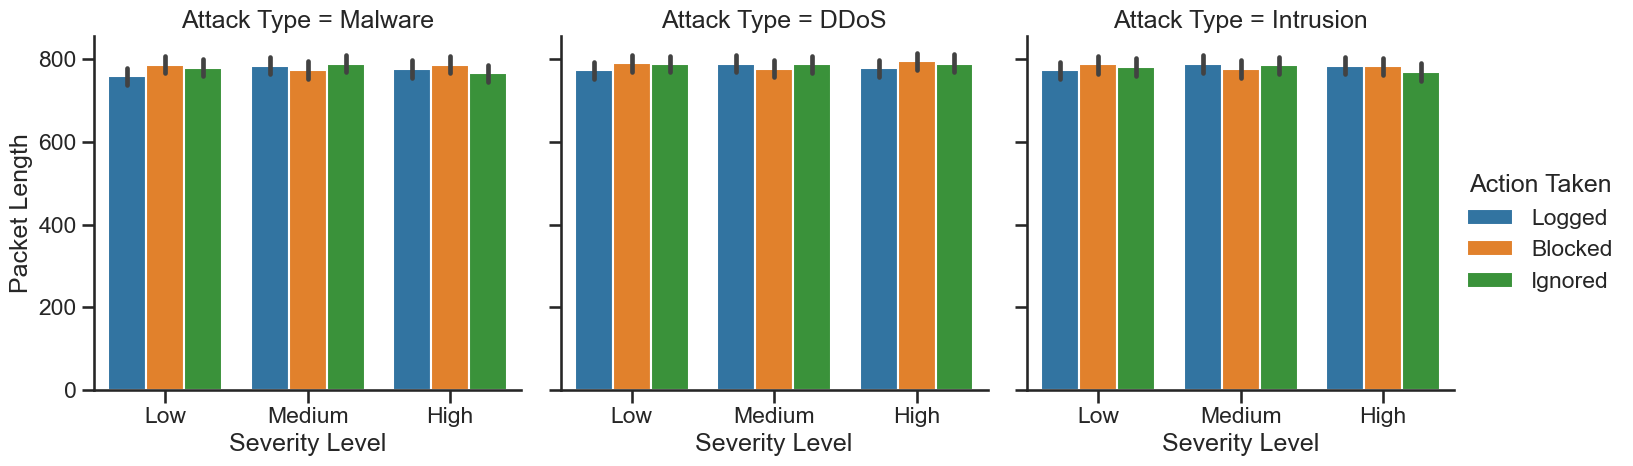

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks",context="talk",palette="tab10")
sns.catplot(x="Severity Level",y="Packet Length",data=df,kind="bar",hue="Action Taken" ,col="Attack Type")
plt.show()

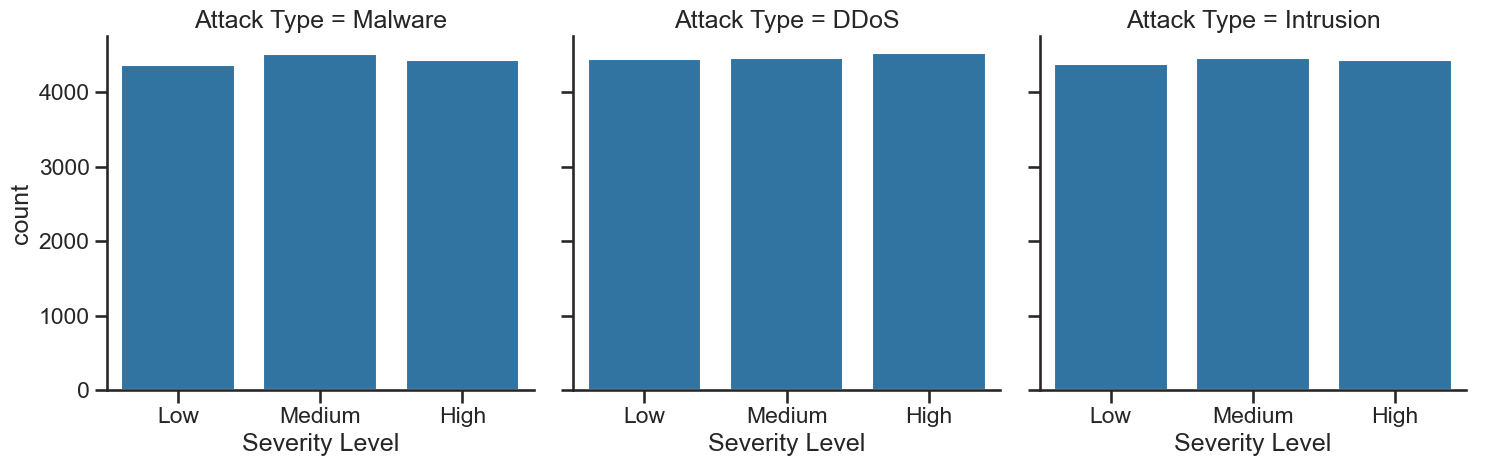

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks",context="talk",palette="tab10")
sns.catplot(x="Severity Level",data=df,kind="count",col="Attack Type")
plt.show()

# MODELADO

## BOSQUE ALEATORIO

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

df = pd.read_csv("cybersecurity_attacks.csv")

# 1. Preprocesar las variables categóricas usando LabelEncoder
label_encoder = LabelEncoder()

df['Severity Level'] = label_encoder.fit_transform(df['Severity Level'])
df['Action Taken'] = label_encoder.fit_transform(df['Action Taken'])
df['Attack Type'] = label_encoder.fit_transform(df['Attack Type'])

# 2. Definir X (características) y y (variable objetivo)

X = df[['Severity Level', 'Action Taken', 'Attack Type']]
y = df['Packet Length']

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 

rf_model.fit(X_train, y_train)

# 5. Predecir en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# 6. Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')




In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

df = pd.read_csv("cybersecurity_attacks.csv")

# 1. Preprocesar las variables categóricas usando LabelEncoder
label_encoder = LabelEncoder()

df['Severity Level'] = label_encoder.fit_transform(df['Severity Level'])
df['Action Taken'] = label_encoder.fit_transform(df['Action Taken'])
df['Attack Type'] = label_encoder.fit_transform(df['Attack Type'])

# 2. Definir X (características) y y (variable objetivo)

X = df[['Packet Length', 'Action Taken', 'Attack Type']]
y = df['Severity Level']

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 

rf_model.fit(X_train, y_train)

# 5. Predecir en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# 6. Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')




In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

df = pd.read_csv("cybersecurity_attacks.csv")

# 1. Preprocesar las variables categóricas usando LabelEncoder
label_encoder = LabelEncoder()

df['Severity Level'] = label_encoder.fit_transform(df['Severity Level'])
df['Action Taken'] = label_encoder.fit_transform(df['Action Taken'])
df['Attack Type'] = label_encoder.fit_transform(df['Attack Type'])

# 2. Definir X (características) y y (variable objetivo)

X = df[['Packet Length', 'Severity Level', 'Attack Type']]
y = df['Action Taken']

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  

rf_model.fit(X_train, y_train)

# 5. Predecir en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# 6. Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')




In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

df = pd.read_csv("cybersecurity_attacks.csv")

# 1. Preprocesar las variables categóricas usando LabelEncoder
label_encoder = LabelEncoder()

df['Severity Level'] = label_encoder.fit_transform(df['Severity Level'])
df['Action Taken'] = label_encoder.fit_transform(df['Action Taken'])
df['Attack Type'] = label_encoder.fit_transform(df['Attack Type'])

# 2. Definir X (características) y y (variable objetivo)

X = df[['Packet Length', 'Severity Level', 'Action Taken']]
y = df['Attack Type']

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 

rf_model.fit(X_train, y_train)

# 5. Predecir en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# 6. Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')




# REGRESION LOGISTICA

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# 1. Preprocesar las variables categóricas usando LabelEncoder
label_encoder = LabelEncoder()

df['Severity Level'] = label_encoder.fit_transform(df['Severity Level'])
df['Action Taken'] = label_encoder.fit_transform(df['Action Taken'])
df['Attack Type'] = label_encoder.fit_transform(df['Attack Type'])

# 2. Definir X (características) y y (variable objetivo)
# Aquí asumimos que 'Packet Length' es la variable objetivo
X = df[['Severity Level', 'Action Taken', 'Attack Type']]
y = df['Packet Length']  # Si 'Packet Length' es un valor continuo, la regresión logística no es adecuada

# Nota: La regresión logística está pensada principalmente para clasificación, no para regresión continua
# Si 'Packet Length' es continuo, lo adecuado sería usar un modelo de regresión como LinearRegression.

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenar el modelo de regresión logística
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)  # Ajustar el max_iter si el modelo no converge

log_reg_model.fit(X_train, y_train)

# 5. Predecir en el conjunto de prueba
y_pred = log_reg_model.predict(X_test)

# 6. Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Si el problema es de regresión (por ejemplo, 'Packet Length' es un valor continuo), usa otros modelos como LinearRegression


# CONCLUSION

Despues de ver el modelado de Random forest y de regresion logistica, y asi como los analisis entre las variables categoricas, se evidencia que no hay una buena correlación entre las variables predictoras (X) y la variable objetivo (y), por que ve se nota que estos modelos no pueden aprender patrones útiles, lo que resulta un bajo accuracy.